# Energy in the Balance: PV reliability to power the Energy Transition

This journal documents the analysis presented at PVRW 2023 by Heather Mirletz. We explore the energy balance as it is effected by the different aspects of PV reliability, or un-reliability. We will use the PV ICE tool baseline and assume immortal PV modules. Then we will add in predicted degradation, and examine the new deployment, mass, and energy requirements to meet energy transition targets. Next we will add in Weibull controlled failures, and finally economic project lifetimes to examine repowering problems.

Through this we will identify the key aspects of PV reliability to emphasize for easing the challenge of energy transition.

In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt
import PV_ICE

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'PVRW2023')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
#print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("pyplot ", plt.matplotlib.__version__)
print("PV_ICE version ", PV_ICE.__version__)

Python version  3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.0.3
pyplot  3.7.2
PV_ICE version  


In [3]:
#https://www.learnui.design/tools/data-color-picker.html#palette
#color pallette - modify here for all graphs below
colorpalette=['#0079C2','#00A4E4','#F7A11A','#5D9732','#933C06','#5E6A71'] # 
import matplotlib as mpl #import matplotlib
from cycler import cycler #import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=colorpalette) #reset the default color palette of mpl

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (8, 6)

scennames_labels = ['PV ICE','Immortal','Degradation','Failures','Project Life'] #

In [4]:
#gradient generator
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

color1 = '#0079C2'
color2 = '#F7A11A'


Scenarios and Materials

In [5]:
#creating scenarios
scennames = ['PV ICE','Immortal','Degradation','Failures','ProjectLife']
MATERIALS = ['glass','silver','silicon', 'copper', 'aluminium_frames'] #'encapsulant', 'backsheet',
moduleFile_m = os.path.join(baselinesfolder, 'baseline_modules_mass_US.csv')
moduleFile_e = os.path.join(baselinesfolder, 'baseline_modules_energy.csv')

In [6]:
#load in a baseline and materials for modification


sim1 = PV_ICE.Simulation(name='sim1', path=testfolder)
for scen in scennames:
    sim1.createScenario(name=scen, massmodulefile=moduleFile_m, energymodulefile=moduleFile_e)
    for mat in range (0, len(MATERIALS)):
        matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
        matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
        sim1.scenario[scen].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\PVRW2023
Baseline folder directed to default:  C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\baselines


## Modify Scenarios

### Immortal

In [ ]:
# Immortal

#Lifetime and Degradation
#values taken from lifetime vs recycling paper
#degradation rate:
sim1.modifyScenario('Immortal', 'mod_degradation', 0.0, start_year=2022) #
#Mod Project Lifetime
sim1.modifyScenario('Immortal', 'mod_lifetime', 200, start_year=2022) #
#T50
sim1.modifyScenario('Immortal', 'mod_reliability_t50', 250, start_year=2022)
#t90
sim1.modifyScenario('Immortal', 'mod_reliability_t90', 280, start_year=2022) 



### Degradation

In [ ]:
# Degradation

#Lifetime and Degradation
#values taken from lifetime vs recycling paper
#degradation rate:
sim1.modifyScenario('Degradation', 'mod_degradation', 0.7, start_year=2022) # Jordan et al 2022
#Mod Project Lifetime
sim1.modifyScenario('Degradation', 'mod_lifetime', 200, start_year=2022) #
#T50
sim1.modifyScenario('Degradation', 'mod_reliability_t50', 250, start_year=2022)
#t90
sim1.modifyScenario('Degradation', 'mod_reliability_t90', 280, start_year=2022) 

### Failures

In [ ]:
# Failures

#Lifetime and Degradation
#values taken from lifetime vs recycling paper
#degradation rate:
sim1.modifyScenario('Failures', 'mod_degradation', 0.7, start_year=2022) # Jordan et al 2022
#Mod Project Lifetime
sim1.modifyScenario('Failures', 'mod_lifetime', 200, start_year=2022) #
#T50
sim1.modifyScenario('Failures', 'mod_reliability_t50', 32, start_year=2022) #for a 30 year module
#t90
sim1.modifyScenario('Failures', 'mod_reliability_t90', 36, start_year=2022) #for a 30 year module

### Project Lifetime/Repowering

In [ ]:
# Project Lifetime/Repowering

#Lifetime and Degradation
#values taken from lifetime vs recycling paper
#degradation rate:
sim1.modifyScenario('ProjectLife', 'mod_degradation', 0.7, start_year=2022) # Jordan et al 2022
#Mod Project Lifetime
sim1.modifyScenario('ProjectLife', 'mod_lifetime', 30, start_year=2022) #30 year project life
#T50
sim1.modifyScenario('ProjectLife', 'mod_reliability_t50', 32, start_year=2022) #for a 30 year module
#t90
sim1.modifyScenario('ProjectLife', 'mod_reliability_t90', 36, start_year=2022) #for a 30 year module

Modify Years

In [ ]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim1.trim_Years(startYear=2000, endYear=2100)

# Global Deployment Projection

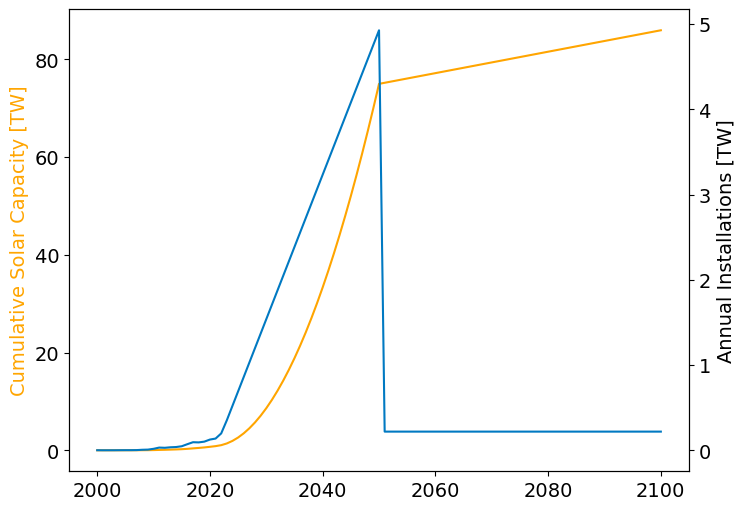

In [7]:
#global_projection = pd.read_csv(os.path.join(supportMatfolder,'input-globalDeploymentProjection-HieslmairPlus.csv'), index_col=0)
global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)
#global_projection = pd.read_csv(os.path.join(supportMatfolder,'input-expotoflatGlobalInstallsProjection.csv'), index_col=0)

#global_projection = pd.read_csv(os.path.join(supportMatfolder,'output-globalInstallsProjection.csv'), index_col=0)

fig, ax1 = plt.subplots()

ax1.plot(global_projection['World_Cumu_[MW]']/1e6, color='orange')
ax1.set_ylabel('Cumulative Solar Capacity [TW]', color='orange')
ax2 = ax1.twinx()
ax2.plot(global_projection['World_Annual_[MW]']/1e6)
ax2.set_ylabel('Annual Installations [TW]')
plt.show()


Single Install in time

In [ ]:
idx_temp = pd.RangeIndex(start=2000,stop=2101,step=1) #create the index
single_deploy_2025 = pd.DataFrame(index=idx_temp, columns=['MW'], dtype=float)
single_deploy_2025['MW'] = 0.0
single_deploy_2025.loc[2025,'MW'] = 100.0

In [ ]:
#deployment projection for all scenarios
sim1.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value=global_projection['World_Annual_[MW]'], start_year=2000) #
#single deployment: single_deploy_2025['MW']
#global deployment: global_projection['World_annual_[MWdc]']

## Run Simulation - No Replacements

In [ ]:
sim1.calculateFlows()
#sim1.calculateFlows(scenarios=['CheapCrap'], weibullInputParams=cheapcrapweibull)

In [ ]:
sim1.scenario['PV ICE'].dataOut_m.to_pickle('dataOut_m.pkl')
sim1.scenario['PV ICE'].dataIn_m.to_pickle('dataIn_m.pkl')
sim1.scenario['PV ICE'].dataOut_e.to_pickle('dataOut_e.pkl')
sim1.scenario['PV ICE'].dataIn_e.to_pickle('dataIn_e.pkl')
sim1.scenario['PV ICE'].material['silicon'].matdataIn_e.to_pickle('matdataIn_e.pkl')
sim1.scenario['PV ICE'].material['silicon'].matdataIn_m.to_pickle('matdataIn_m.pkl')
sim1.scenario['PV ICE'].material['silicon'].matdataOut_e.to_pickle('matdataOut_e.pkl')
sim1.scenario['PV ICE'].material['silicon'].matdataOut_m.to_pickle('matdataOut_m.pkl')


In [ ]:
ii_yearly, ii_cumu = sim1.aggregateResults() #have to do this to get auto plots
ii_allenergy, ii_energyGen, ii_energy_demands = sim1.aggregateEnergyResults()

In [ ]:
effective_capacity = ii_yearly.filter(like='ActiveCapacity')
#plt.plot(ii_cumu['newInstalledCapacity_sim1_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
plt.plot(effective_capacity.iloc[:,1:5]/1e6, label=scennames_labels[1:5])
plt.legend(loc='center left')
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
#plt.ylim(0,)


Note to self: changing the degradation of nameplate to 80% instead of 50% kill threshold did not change the above result

## Run Simulation - Replacements

In [ ]:
#currently takes 15 mins to run with 5 mateirals and 5 scenarios

for row in range (0,len(sim1.scenario['PV ICE'].dataIn_m)): #loop over length of years
    for scen in scennames: #loop over scenarios
        Under_Installment = global_projection.iloc[row,0] - ((sim1.scenario[scen].dataOut_m['Effective_Capacity_[W]'][row])/1e6)  # MWATTS
        sim1.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed
        #calculate flows for that scenario with it's bifi factor and modified weibull
        sim1.calculateFlows(scenarios=[scen]) # , bifacialityfactors=bifiPathDict[scen]

In [ ]:
cc_yearly, cc_cumu = sim1.aggregateResults() #have to do this to get auto plots
allenergy, energyGen, energy_demands = sim1.aggregateEnergyResults()

In [ ]:
effective_capacity = cc_yearly.filter(like='ActiveCapacity')
#plt.plot(ii_cumu['newInstalledCapacity_sim1_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
plt.plot(effective_capacity, label=scennames_labels)
plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
#plt.ylim(0,)

### Cumulative Installs with Replacements

In [ ]:
cumu_installs = cc_cumu.filter(like='newInstalled')
plt.bar(scennames, cumu_installs.loc[2100]/1e6, tick_label=scennames_labels, color=colorpalette)
#plt.legend(scennames)
plt.ylabel('Cumulative installed [TW]')
plt.title('Cumulative Installs with Replacements')
plt.ylim(0,160)

In [ ]:
cumu_installs.loc[2100]/1e6

In [ ]:
e_annual_sumDemands = energy_demands.filter(like='demand_total')
e_annual_sumDemands_cumu = e_annual_sumDemands.cumsum()
energyGen_cumu = energyGen.cumsum()
energyGen_cumu.columns = e_annual_sumDemands_cumu.columns = scennames
netEnergy_cumu = energyGen_cumu.loc[[2100]] - e_annual_sumDemands_cumu.loc[[2100]]

In [ ]:
plt.bar(netEnergy_cumu.columns, netEnergy_cumu.loc[2100]/1e12, 
        tick_label=(scennames_labels), color=colorpalette)
plt.title('Net Energy Cumulatively with Replacements')
plt.ylabel('Cumulative Net Energy [TWh]')
plt.ylim(4e6,5.5e6)

In [ ]:
eroi = energyGen_cumu.loc[[2100]] / e_annual_sumDemands_cumu.loc[[2100]]

plt.bar(eroi.columns, eroi.loc[2100], 
        tick_label=(scennames), color=colorpalette)
plt.title('EROI ')
plt.ylabel('Arbitrary units')

In [ ]:
eroi

# Explore Degradation
explore effect of the range of degradation rates as presented in Jordan et al 2022

In [8]:
# from Jordan et al 2022: -1.9%/yr is lowest (P90), will do one more for visual effect
#25% quartile is -0.55% for PERC
#outliers read in up to +0.5%
Degradation_Range = round(pd.Series(np.linspace(0.1,2.0, num=20)), 1)
#Degradation_Range

In [9]:
sim2 = PV_ICE.Simulation(name='sim2_deg', path=testfolder) #init simulation

for degs in range(0,len(Degradation_Range)):
        scenname = 'deg_' + str(Degradation_Range[degs])+'%/yr' #name the scenario
        sim2.createScenario(name=scenname, massmodulefile=moduleFile_m, energymodulefile=moduleFile_e) #create the scenario with name
        for mat in range (0, len(MATERIALS)):
            matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
            matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
            sim2.scenario[scenname].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\PVRW2023
Baseline folder directed to default:  C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\baselines


In [10]:
scennames2 = pd.Series(sim2.scenario.keys())
scennames2

0     deg_0.1%/yr
1     deg_0.2%/yr
2     deg_0.3%/yr
3     deg_0.4%/yr
4     deg_0.5%/yr
5     deg_0.6%/yr
6     deg_0.7%/yr
7     deg_0.8%/yr
8     deg_0.9%/yr
9     deg_1.0%/yr
10    deg_1.1%/yr
11    deg_1.2%/yr
12    deg_1.3%/yr
13    deg_1.4%/yr
14    deg_1.5%/yr
15    deg_1.6%/yr
16    deg_1.7%/yr
17    deg_1.8%/yr
18    deg_1.9%/yr
19    deg_2.0%/yr
dtype: object

In [11]:
# Degradation

#Lifetime and Degradation
# use scenarios is none to set all
#Mod Project Lifetime
sim2.modifyScenario(scenarios=None, stage='mod_lifetime', value=200, start_year=2022) #
#T50
sim2.modifyScenario(scenarios=None, stage='mod_reliability_t50', value=250, start_year=2022)
#t90
sim2.modifyScenario(scenarios=None, stage='mod_reliability_t90', value=280, start_year=2022) 

In [12]:
#degradation rates:
#modify scenarios with dictionary of deg rates range from Jordan et al 2022

for scen in range(0,len(scennames2)):
    sim2.modifyScenario(scennames2[scen], 'mod_degradation', Degradation_Range[scen], start_year=2022) # Jordan et al 2022

In [13]:
sim2.scenario['deg_1.6%/yr'].dataIn_m.tail(2)

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_Repair,mod_MerchantTail,...,mod_EOL_pg1_landfill,mod_EOL_pg2_stored,mod_EOL_pg3_reMFG,mod_EOL_pg4_recycled,mod_EOL_reMFG_yield,mod_EOL_sp_reMFG_recycle,mod_EOL_pb1_landfill,mod_EOL_pb2_stored,mod_EOL_pb3_reMFG,mod_EOL_pb4_recycled
54,2049,140186.0884,24.94841,250,280,1.6,200.0,98,0,0,...,60,0,0,40,0,100,60,0,0,40
55,2050,152662.6502,25.00164,250,280,1.6,200.0,98,0,0,...,60,0,0,40,0,100,60,0,0,40


In [14]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim2.trim_Years(startYear=2000, endYear=2100)

#deployment projection for all scenarios
sim2.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value=global_projection['World_Annual_[MW]'], start_year=2000) #
#single deployment: single_deploy_2025['MW']
#global deployment: global_projection['World_annual_[MWdc]']

Trimming and extending  deg_0.1%/yr
deg_0.1%/yr glass : Data trimmed for Energy, years now encompass  2000  to  2100
deg_0.1%/yr silver : Data trimmed for Energy, years now encompass  2000  to  2100
deg_0.1%/yr silicon : Data trimmed for Energy, years now encompass  2000  to  2100
deg_0.1%/yr copper : Data trimmed for Energy, years now encompass  2000  to  2100
deg_0.1%/yr aluminium_frames : Data trimmed for Energy, years now encompass  2000  to  2100
deg_0.1%/yr aluminium_frames : Data trimmed for Mass, years now encompass  2000  to  2100
Trimming and extending  deg_0.2%/yr
deg_0.2%/yr glass : Data trimmed for Energy, years now encompass  2000  to  2100
deg_0.2%/yr silver : Data trimmed for Energy, years now encompass  2000  to  2100
deg_0.2%/yr silicon : Data trimmed for Energy, years now encompass  2000  to  2100
deg_0.2%/yr copper : Data trimmed for Energy, years now encompass  2000  to  2100
deg_0.2%/yr aluminium_frames : Data trimmed for Energy, years now encompass  2000  to  210

In [15]:
sim2.calculateFlows(nameplatedeglimit=0.8)

>>>> Calculating Material Flows <<<<

Working on Scenario:  deg_0.1%/yr
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  deg_0.2%/yr
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  deg_0.3%/yr
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  aluminium_frames
Working on Scenario:  deg_0.4%/yr
********************
Finished Area+Power Generation Calculations
==> Working on Material : 

In [16]:
sim2_ii_yearly, sim2_ii_cumu = sim2.aggregateResults() #have to do this to get auto plots
sim2_ii_allenergy, sim2_ii_energyGen, sim2_ii_energy_demands = sim2.aggregateEnergyResults()

C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  USyearly[nicekey+'_'+mat+'_'+self.name+'_'+scen] = self.scenario[scen].material[mat].matdataOut_m[keywd]
C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:2166: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  USyearly[nicekey+'_Module_'+self.name+'_'+scen] = USyearly[filter_col].sum(axis=1)
C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\main.py:2164: PerformanceWarning: DataFrame is highly fragmented.  This is usua

In [17]:
global_projection.loc[2049:2051,:]/1e6

,World_Cumu_[MW],World_Annual_[MW]
Year,,
2049,70.07065,4.759857
2050,75.00000,4.929350
2051,75.21932,0.219320


(0.0, 90.26425956655)

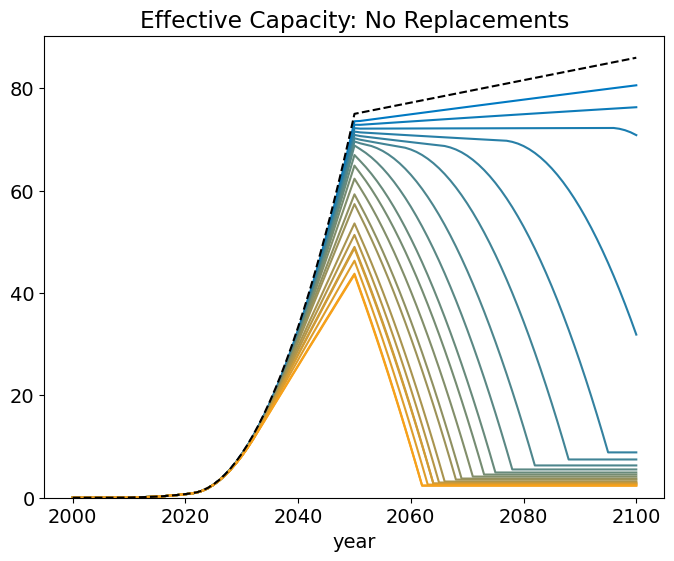

In [18]:
effective_capacity = sim2_ii_yearly.filter(like='ActiveCapacity')
#plt.plot(ii_cumu['newInstalledCapacity_sim1_PV_ICE_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
    
#plt.plot(effective_capacity/1e6)
#plt.legend()
#plt.ylabel('Effective Capacity [TW]')
#plt.title('Effective Capacity: No Replacements')
#plt.ylim(0,)

colors = get_color_gradient(color1, color2, len(scennames2)) #generates a list of hex values
effective_capacity_tw = effective_capacity/1e6
effective_capacity_tw.plot(color=colors, legend=False, title='Effective Capacity: No Replacements')
#plt.plot(ii_cumu['newInstalledCapacity_sim1_Immortal_[MW]']/1e6, label='Capacity Target', color='black', ls='--') 
plt.plot(global_projection['World_Cumu_[MW]']/1e6, label='Capacity Target', color='black', ls='--') 

plt.ylim(0,)

In [ ]:
plt.plot(global_projection['World_Cumu_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
plt.ylabel('Effective Capacity [TW]')
plt.xlabel('year')
plt.title('Effective Capacity: No Replacements')

In [ ]:
colors = get_color_gradient(color1, color2, len(scennames2)) #generates a list of hex values

effective_capacity_tw = effective_capacity/1e6
for scen in range(0,len(scennames2)):
    effective_capacity_tw.iloc[:,0:scen+1].plot(color=colors, legend=False, title='Effective Capacity: No Replacements')
    plt.plot(global_projection['World_Cumu_[MW]']/1e6, label='Capacity Target', color='black', ls='--') 
    plt.ylim(0,)
    plt.ylabel('Effective Capacity [TW]')
    plt.savefig(os.path.join(testfolder, 'deg'+str(scen)))
    
#plt.title('Effective Capacity: No Replacements')

In [ ]:
for row in range (0,len(sim2.scenario['deg_1.5%/yr'].dataIn_m)): #loop over length of years
    for scen in scennames2: #loop over scenarios
        Under_Installment = global_projection.iloc[row,0] - ((sim2.scenario[scen].dataOut_m['Effective_Capacity_[W]'][row])/1e6)  # MWATTS
        sim2.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed
        #calculate flows for that scenario with it's bifi factor and modified weibull
        sim2.calculateFlows(scenarios=[scen], nameplatedeglimit=0.8) # , bifacialityfactors=bifiPathDict[scen]

In [ ]:
sim2_cc_yearly, sim2_cc_cumu = sim2.aggregateResults() #have to do this to get auto plots
sim2_allenergy, sim2_energyGen, sim2_energy_demands = sim2.aggregateEnergyResults()

In [ ]:
sim2_cc_yearly.to_csv(os.path.join(testfolder,'deg_cc_yearly_m.csv'))
sim2_cc_cumu.to_csv(os.path.join(testfolder,'deg_cc_cumu_m.csv'))
sim2_allenergy.to_csv(os.path.join(testfolder,'deg_cc_allE.csv'))
sim2_energyGen.to_csv(os.path.join(testfolder,'deg_cc_Egen.csv'))
sim2_energy_demands.to_csv(os.path.join(testfolder,'deg_cc_Edemand.csv'))

In [35]:
sim2_cc_yearly = pd.read_csv(os.path.join(testfolder, 'Deploy_HieslmairSigmoid','deg_cc_yearly_m.csv'))
sim2_cc_cumu = pd.read_csv(os.path.join(testfolder, 'Deploy_HieslmairSigmoid','deg_cc_cumu_m.csv'))
sim2_allenergy = pd.read_csv(os.path.join(testfolder, 'Deploy_HieslmairSigmoid','deg_cc_allE.csv'))
sim2_energyGen = pd.read_csv(os.path.join(testfolder, 'Deploy_HieslmairSigmoid','deg_cc_Egen.csv'))
sim2_energy_demands = pd.read_csv(os.path.join(testfolder, 'Deploy_HieslmairSigmoid','deg_cc_Edemand.csv'))

#fix index
sim2_cc_yearly.index = sim2_ii_yearly.index
sim2_cc_cumu.index = sim2_ii_yearly.index
sim2_allenergy.index = sim2_ii_yearly.index
sim2_energyGen.index = sim2_ii_yearly.index
sim2_energy_demands.index = sim2_ii_yearly.index

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_23140\440289706.py:3: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(sim2.scenario.keys(), 'upper left')


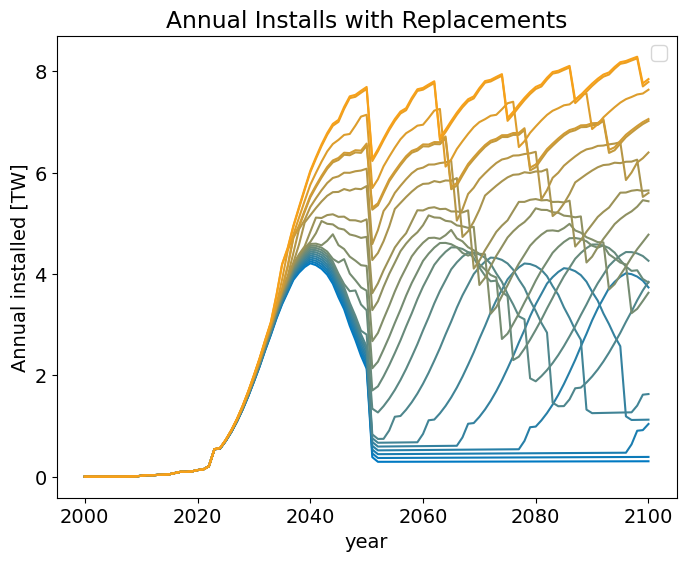

In [36]:
annual_installs = sim2_cc_yearly.filter(like='newInstalled')/1e6
annual_installs.plot(color=colors)
plt.legend(sim2.scenario.keys(), 'upper left')
plt.ylabel('Annual installed [TW]')
plt.title('Annual Installs with Replacements')
plt.savefig(os.path.join(testfolder, 'degs_annualInstalls'))

In [37]:
cumu_installs = sim2_cc_cumu.filter(like='newInstalled')
cumu_installs

,newInstalledCapacity_sim2_deg_deg_0.1%/yr_[MW],newInstalledCapacity_sim2_deg_deg_0.2%/yr_[MW],newInstalledCapacity_sim2_deg_deg_0.3%/yr_[MW],newInstalledCapacity_sim2_deg_deg_0.4%/yr_[MW],newInstalledCapacity_sim2_deg_deg_0.5%/yr_[MW],newInstalledCapacity_sim2_deg_deg_0.6%/yr_[MW],newInstalledCapacity_sim2_deg_deg_0.7%/yr_[MW],newInstalledCapacity_sim2_deg_deg_0.8%/yr_[MW],newInstalledCapacity_sim2_deg_deg_0.9%/yr_[MW],newInstalledCapacity_sim2_deg_deg_1.0%/yr_[MW],newInstalledCapacity_sim2_deg_deg_1.1%/yr_[MW],newInstalledCapacity_sim2_deg_deg_1.2%/yr_[MW],newInstalledCapacity_sim2_deg_deg_1.3%/yr_[MW],newInstalledCapacity_sim2_deg_deg_1.4%/yr_[MW],newInstalledCapacity_sim2_deg_deg_1.5%/yr_[MW],newInstalledCapacity_sim2_deg_deg_1.6%/yr_[MW],newInstalledCapacity_sim2_deg_deg_1.7%/yr_[MW],newInstalledCapacity_sim2_deg_deg_1.8%/yr_[MW],newInstalledCapacity_sim2_deg_deg_1.9%/yr_[MW],newInstalledCapacity_sim2_deg_deg_2.0%/yr_[MW]
year,,,,,,,,,,,,,,,,,,,,
2000,8.086690e+02,8.086690e+02,8.086690e+02,8.086690e+02,8.086690e+02,8.086690e+02,8.086690e+02,8.086690e+02,8.086690e+02,8.086690e+02,8.086690e+02,8.086690e+02,8.086690e+02,8.086690e+02,8.086690e+02,8.086690e+02,8.086690e+02,8.086690e+02,8.086690e+02,8.086690e+02
2001,1.099051e+03,1.099051e+03,1.099051e+03,1.099051e+03,1.099051e+03,1.099051e+03,1.099051e+03,1.099051e+03,1.099051e+03,1.099051e+03,1.099051e+03,1.099051e+03,1.099051e+03,1.099051e+03,1.099051e+03,1.099051e+03,1.099051e+03,1.099051e+03,1.099051e+03,1.099051e+03
2002,1.451322e+03,1.451322e+03,1.451322e+03,1.451322e+03,1.451322e+03,1.451322e+03,1.451322e+03,1.451322e+03,1.451322e+03,1.451322e+03,1.451322e+03,1.451322e+03,1.451322e+03,1.451322e+03,1.451322e+03,1.451322e+03,1.451322e+03,1.451322e+03,1.451322e+03,1.451322e+03
2003,1.990076e+03,1.990076e+03,1.990076e+03,1.990076e+03,1.990076e+03,1.990076e+03,1.990076e+03,1.990076e+03,1.990076e+03,1.990076e+03,1.990076e+03,1.990076e+03,1.990076e+03,1.990076e+03,1.990076e+03,1.990076e+03,1.990076e+03,1.990076e+03,1.990076e+03,1.990076e+03
2004,3.091790e+03,3.091790e+03,3.091790e+03,3.091790e+03,3.091790e+03,3.091790e+03,3.091790e+03,3.091790e+03,3.091790e+03,3.091790e+03,3.091790e+03,3.091790e+03,3.091790e+03,3.091790e+03,3.091790e+03,3.091790e+03,3.091790e+03,3.091790e+03,3.091790e+03,3.091790e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,9.047484e+07,9.498514e+07,9.949545e+07,1.386532e+08,1.721705e+08,1.809617e+08,1.992578e+08,2.275343e+08,2.522276e+08,2.697829e+08,2.874537e+08,3.123007e+08,3.284117e+08,3.628521e+08,3.836355e+08,4.065424e+08,4.090270e+08,4.359349e+08,4.673446e+08,4.697486e+08
2097,9.077925e+07,9.537464e+07,1.001340e+08,1.426493e+08,1.732904e+08,1.822325e+08,2.025188e+08,2.319650e+08,2.562886e+08,2.730099e+08,2.917812e+08,3.175355e+08,3.340539e+08,3.690684e+08,3.896369e+08,4.133321e+08,4.158620e+08,4.434263e+08,4.755565e+08,4.779930e+08
2098,9.108388e+07,9.576458e+07,1.010414e+08,1.465976e+08,1.744123e+08,1.836356e+08,2.059996e+08,2.363706e+08,2.603616e+08,2.763222e+08,2.962712e+08,3.228633e+08,3.397105e+08,3.753230e+08,3.958365e+08,4.202090e+08,4.227812e+08,4.509672e+08,4.838102e+08,4.862787e+08


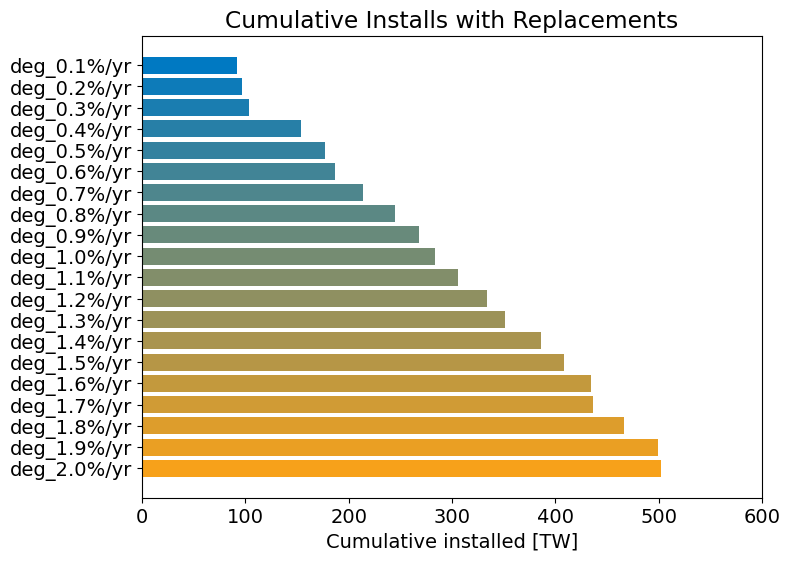

In [38]:
decades = [2030,2040,2050,2060,2070,2080,2090,2100]
for years in decades:
    plt.barh(scennames2[::-1], cumu_installs.loc[years,::-1]/1e6, color=colors[::-1])
    #plt.legend(scennames)
    plt.xlabel('Cumulative installed [TW]')
    plt.title('Cumulative Installs with Replacements')
    plt.xlim(0,600)
    #plt.xticks(rotation=90)
    plt.savefig(os.path.join(testfolder, 'CumuReplace_'+str(years)))

In [ ]:

plt.barh(scennames2[::-1], cumu_installs.loc[2100,::-1]/1e6, color=colors[::-1])
#plt.legend(scennames)
plt.xlabel('Cumulative installed [TW]')
plt.title('Cumulative Installs with Replacements')
plt.xlim(0,600)
#plt.xticks(rotation=90)
plt.savefig(os.path.join(testfolder, 'CUMUreplacements_by_deg'))

In [ ]:
plt.barh(scennames2[::-1], cumu_installs.loc[2030,::-1]/1e6, color=colors[::-1])
#plt.legend(scennames)
plt.xlabel('Cumulative installed [TW]')
plt.title('Cumulative Installs with Replacements')
plt.xlim(0,600)
#plt.xticks(rotation=90)
plt.savefig(os.path.join(testfolder, 'CUMUreplacements_by_deg'))

In [ ]:
plt.barh(scennames2[::-1], cumu_installs.loc[2050,::-1]/1e6, color=colors[::-1])
#plt.legend(scennames)
plt.xlabel('Cumulative installed [TW]')
plt.title('Cumulative Installs with Replacements')
plt.xlim(0,600)
#plt.xticks(rotation=90)
plt.savefig(os.path.join(testfolder, 'CUMUreplacements_by_deg'))

In [ ]:
plt.barh(scennames2[::-1], cumu_installs.loc[2075,::-1]/1e6, color=colors[::-1])
#plt.legend(scennames)
plt.xlabel('Cumulative installed [TW]')
plt.title('Cumulative Installs with Replacements')
plt.xlim(0,600)
#plt.xticks(rotation=90)
plt.savefig(os.path.join(testfolder, 'CUMUreplacements_by_deg'))

### Save how many TW installs by year 20XX

In [ ]:
(cumu_installs.loc[2100,'newInstalledCapacity_sim2_deg_deg_2.0%/yr_[MW]']-cumu_installs.loc[2100,'newInstalledCapacity_sim2_deg_deg_1.9%/yr_[MW]'])/1e6
#TW

In [ ]:

years_of_interest = [2030,2050,2100]
for year in years_of_interest:
    for scen in range(0,len(scennames2)-1):
        deg_installs = cumu_installs.loc[year,'newInstalledCapacity_sim2_deg_'+str(scennames2[scen]+'_[MW]')]
        deg_minus_n_installs = cumu_installs.loc[year,'newInstalledCapacity_sim2_deg_'+str(scennames2[scen+1]+'_[MW]')]
        print(year,'_',scen,'-',str(scen+1),round((deg_minus_n_installs-deg_installs)/1e6,2),'TW')

In [ ]:
(cumu_installs.loc[2100,'newInstalledCapacity_sim2_deg_deg_2.0%/yr_[MW]']-cumu_installs.loc[2100,'newInstalledCapacity_sim2_deg_deg_0.7%/yr_[MW]'])/1e6

In [ ]:
(cumu_installs.loc[2100,'newInstalledCapacity_sim2_deg_deg_0.1%/yr_[MW]']-cumu_installs.loc[2100,'newInstalledCapacity_sim2_deg_deg_0.7%/yr_[MW]'])/1e6

In [ ]:
(cumu_installs.loc[2100,'newInstalledCapacity_sim2_deg_deg_0.6%/yr_[MW]']-cumu_installs.loc[2100,'newInstalledCapacity_sim2_deg_deg_0.7%/yr_[MW]'])/1e6

In [ ]:
(cumu_installs.loc[2100,'newInstalledCapacity_sim2_deg_deg_0.8%/yr_[MW]']-cumu_installs.loc[2100,'newInstalledCapacity_sim2_deg_deg_0.7%/yr_[MW]'])/1e6

In [ ]:
#sim2_allenergy, sim2_energyGen, sim2_energy_demands
e_annual_sumDemands = sim2_energy_demands.filter(like='demand_total')
e_annual_sumDemands_cumu = e_annual_sumDemands.cumsum()
energyGen_cumu = sim2_energyGen.cumsum()
energyGen_cumu.columns = e_annual_sumDemands_cumu.columns = scennames2
netEnergy_cumu = energyGen_cumu.loc[[2100]] - e_annual_sumDemands_cumu.loc[[2100]]

In [ ]:
eroi = energyGen_cumu.loc[[2100]] / e_annual_sumDemands_cumu.loc[[2100]]

plt.barh(eroi.columns[::-1], eroi.loc[2100,::-1], 
        tick_label=(scennames2[::-1]), color=colors[::-1])
plt.title('EROI ')
plt.xlabel('Arbitrary units')
#plt.xticks(rotation=90)

# Explore Failures
Explore the effect of the range of failures from Heislmair and IRENA

In [ ]:
weibulls= {'class_a':[2.810, 100.238], 
           'class_b':[3.841,57.491], 
           'class_c':[4.602,40.767], 
           'class_d':[5.692,29.697], 
           'regular loss':[5.3759,30],
           'early loss':[2.4928,30]}
#weibulls[scen]
weibullist = list(weibulls.keys())
weibullsdf = pd.DataFrame(weibulls, index=['alpha','beta'])
#weibullist[0]

In [ ]:
for col in weibullist:
    a = weibullsdf.loc['alpha', col]
    b = weibullsdf.loc['beta', col]
    cdf = PV_ICE.weibull_cdf_vis(a, b,xlim=100)
    plt.plot(cdf, label=col)
#plt.legend(weibullist)
plt.title('Weibull Failure CDF')
plt.ylabel('Probability')
plt.xlabel('Years')

In [ ]:
sim3 = PV_ICE.Simulation(name='sim3_fail', path=testfolder) #init simulation

for var in range(0,len(weibulls)):
        scenname = str(weibullist[var]) #name the scenario
        sim3.createScenario(name=scenname, massmodulefile=moduleFile_m, energymodulefile=moduleFile_e) #create the scenario with name
        for mat in range (0, len(MATERIALS)):
            matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
            matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
            sim3.scenario[scenname].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

In [ ]:
scennames3 = sim3.scenario.keys()

In [ ]:
#Mod Project Lifetime on all 
sim3.modifyScenario(scenarios=None, stage='mod_lifetime', value=200, start_year=2022) #
#degradation rate:
sim3.modifyScenario(scenarios=None, stage='mod_degradation', value=0.0, start_year=2022)

In [ ]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim3.trim_Years(startYear=2000, endYear=2100)

#deployment projection for all scenarios
sim3.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value=global_projection['World_annual_[MWdc]'], start_year=2000) #
#single deployment: single_deploy_2025['MW']
#global deployment: global_projection['World_annual_[MWdc]']

In [ ]:
for scen in scennames3:
    sim3.calculateFlows(scenarios=[scen], weibullInputParams=dict(weibullsdf[scen].T))

In [ ]:
sim3_ii_yearly, sim3_ii_cumu = sim3.aggregateResults() #have to do this to get auto plots
sim3_ii_allenergy, sim3_ii_energyGen, sim3_ii_energy_demands = sim3.aggregateEnergyResults()

In [ ]:
effective_capacity = sim3_ii_yearly.filter(like='ActiveCapacity')
#effective_capacity_tw = effective_capacity/1e6
#effective_capacity_tw.plot(color=colors, legend=False, title='Effective Capacity: No Replacements')

plt.plot(ii_cumu['newInstalledCapacity_sim1_Immortal_[MW]']/1e6, label='Capacity Target', color='black', ls='--')    
plt.plot(effective_capacity/1e6, label=scennames3)
plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
plt.ylim(0,)

In [ ]:
effective_capacity_tw = effective_capacity/1e6



for scen in range(0,len(scennames3)):
    effective_capacity_tw.iloc[:,0:scen+1].plot(color=colorpalette, legend=False, title='Effective Capacity: No Replacements')
    plt.plot(ii_cumu['newInstalledCapacity_sim1_Immortal_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
    plt.ylim(0,)
    plt.ylabel('Effective Capacity [TW]')
    #plt.legend(scennames3)
    plt.savefig(os.path.join(testfolder, 'fail'+str(scen)))
    
#plt.title('Effective Capacity: No Replacements')

In [ ]:
for row in range (0,len(sim3.scenario['class_a'].dataIn_m)): #loop over length of years
    for scen in scennames3: #loop over scenarios
        Under_Installment = global_projection.iloc[row,0] - ((sim3.scenario[scen].dataOut_m['Effective_Capacity_[W]'][row])/1e6)  # MWATTS
        sim3.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed
        #calculate flows for that scenario with it's bifi factor and modified weibull
        sim3.calculateFlows(scenarios=[scen], weibullInputParams=dict(weibullsdf[scen].T))

In [ ]:
sim3_cc_yearly, sim3_cc_cumu = sim3.aggregateResults() #have to do this to get auto plots
sim3_allenergy, sim3_energyGen, sim3_energy_demands = sim3.aggregateEnergyResults()

In [ ]:
sim3_cc_yearly.to_csv(os.path.join(testfolder,'fail_cc_yearly_m.csv'))
sim3_cc_cumu.to_csv(os.path.join(testfolder,'fail_cc_cumu_m.csv'))
sim3_allenergy.to_csv(os.path.join(testfolder,'fail_cc_allE.csv'))
sim3_energyGen.to_csv(os.path.join(testfolder,'fail_cc_Egen.csv'))
sim3_energy_demands.to_csv(os.path.join(testfolder,'fail_cc_Edemand.csv'))

In [ ]:
effective_capacity = sim3_cc_yearly.filter(like='ActiveCapacity')
#effective_capacity_tw = effective_capacity/1e6
#effective_capacity_tw.plot(color=colors, legend=False, title='Effective Capacity: No Replacements')

#plt.plot(ii_cumu['newInstalledCapacity_sim1_Immortal_[MW]']/1e6, label='Capacity Target', color='black', ls='--')    
plt.plot(effective_capacity/1e6, label=scennames3)
plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
plt.ylim(0,)

In [ ]:
cumu_installs = sim3_cc_cumu.filter(like='newInstalled')
plt.bar(scennames3, cumu_installs.loc[2100]/1e6, color=colorpalette)
#plt.legend(scennames3)
plt.ylabel('Cumulative installed [TW]')
plt.title('Cumulative Installs with Replacements')
#plt.ylim(0,160)
plt.xticks(rotation=45)

In [ ]:
cumu_installs.loc[2100]/1e6

In [ ]:
(cumu_installs.loc[2100,'newInstalledCapacity_sim3_fail_class_a_[MW]'] - cumu_installs.loc[2100,'newInstalledCapacity_sim3_fail_early loss_[MW]'])/1e6

In [ ]:
#sim3_allenergy, sim3_energyGen, sim3_energy_demands 
e_annual_sumDemands = sim3_energy_demands.filter(like='demand_total')
e_annual_sumDemands_cumu = e_annual_sumDemands.cumsum()
energyGen_cumu = sim3_energyGen.cumsum()
energyGen_cumu.columns = e_annual_sumDemands_cumu.columns = scennames3
netEnergy_cumu = energyGen_cumu.loc[[2100]] - e_annual_sumDemands_cumu.loc[[2100]]

In [ ]:
e_annual_sumDemands_cumu.loc[2100]

In [ ]:
energyGen_cumu.loc[2100]

In [ ]:
eroi = energyGen_cumu.loc[[2100]] / e_annual_sumDemands_cumu.loc[[2100]]

plt.bar(eroi.columns, eroi.loc[2100], tick_label=eroi.columns, color=colorpalette)
plt.title('EROI ')
plt.ylabel('Arbitrary units')
plt.xticks(rotation=45)

In [ ]:
eroi

# Explore Project Life / Repowering
Explore if repowering happens at varying lifetimes

In [ ]:
# years of project life: 8, 10, 12, 15, 18, 20, 25, 30, 35, 40, 45, 50
lifes = pd.Series([8, 10, 12, 15, 18, 20, 25, 30, 35, 40, 45, 50])
switchindex = lifes.index
lifes = lifes[::-1]
lifes.index = switchindex
#lifes

In [ ]:
sim4 = PV_ICE.Simulation(name='sim4_projectlife', path=testfolder) #init simulation

for var in range(0,len(lifes)):
        scenname = str(lifes[var])+ ' years' #name the scenario
        sim4.createScenario(name=scenname, massmodulefile=moduleFile_m, energymodulefile=moduleFile_e) #create the scenario with name
        for mat in range (0, len(MATERIALS)):
            matbaseline_m = os.path.join(baselinesfolder,'baseline_material_mass_'+MATERIALS[mat]+'.csv')
            matbaseline_e = os.path.join(baselinesfolder,'baseline_material_energy_'+MATERIALS[mat]+'.csv')
            sim4.scenario[scenname].addMaterial(MATERIALS[mat], massmatfile=matbaseline_m, energymatfile=matbaseline_e)

In [ ]:
scennames4 = list(sim4.scenario.keys())
scennames4

In [ ]:
#Mod Project Lifetime on all 
for scen in range(0,len(scennames4)):
    sim4.modifyScenario(scenarios=scennames4[scen], stage='mod_lifetime', value=lifes[scen], start_year=2022) #

In [ ]:
#degradation rate:
sim4.modifyScenario(scenarios=None, stage='mod_degradation', value=0.0, start_year=2022) 
#T50
sim4.modifyScenario(scenarios=None, stage='mod_reliability_t50', value=250, start_year=2022)
#t90
sim4.modifyScenario(scenarios=None, stage='mod_reliability_t90', value=280, start_year=2022) 

In [ ]:
#trim to start in 2000, this trims module and materials
#had to specify and end year, cannot use to extend
sim4.trim_Years(startYear=2000, endYear=2100)

#deployment projection for all scenarios
sim4.modifyScenario(scenarios=None,stage='new_Installed_Capacity_[MW]', 
                    value=global_projection['World_annual_[MWdc]'], start_year=2000) #
#single deployment: single_deploy_2025['MW']
#global deployment: global_projection['World_annual_[MWdc]']

In [ ]:
sim4.scenario['35 years'].dataIn_m.tail(3)

In [ ]:
sim4.calculateFlows()

In [ ]:
sim4_ii_yearly, sim4_ii_cumu = sim4.aggregateResults() #have to do this to get auto plots
sim4_ii_allenergy, sim4_ii_energyGen, sim4_ii_energy_demands = sim4.aggregateEnergyResults()

In [ ]:
effective_capacity = sim4_ii_yearly.filter(like='ActiveCapacity')
#effective_capacity_tw = effective_capacity/1e6
#effective_capacity_tw.plot(color=colors, legend=False, title='Effective Capacity: No Replacements')

plt.plot(ii_cumu['newInstalledCapacity_sim1_Immortal_[MW]']/1e6, label='Capacity Target', color='black', ls='--')    
plt.plot(effective_capacity/1e6, label=scennames4)
plt.legend()
plt.ylabel('Effective Capacity [TW]')
plt.title('Effective Capacity: No Replacements')
#plt.ylim(0,)

In [ ]:
colors4 = get_color_gradient(color2, color1, len(scennames4)) #generates a list of hex values
effective_capacity_tw = effective_capacity/1e6
effective_capacity_tw.plot(color=colors4, legend=False, title='Effective Capacity: No Replacements')
plt.plot(ii_cumu['newInstalledCapacity_sim1_Immortal_[MW]']/1e6, label='Capacity Target', color='black', ls='--')
plt.ylim(0,)
#plt.legend(scennames4)

In [ ]:
for scen in range(0,len(scennames4)):
    effective_capacity_tw.iloc[:,0:scen+1].plot(color=colors4[::-1], legend=False, title='Effective Capacity: No Replacements')
    plt.plot(ii_cumu['newInstalledCapacity_sim1_Immortal_[MW]']/1e6, label='Capacity Target', color='black', ls='--') 
    plt.ylim(0,)
    plt.ylabel('Effective Capacity [TW]')
    plt.savefig(os.path.join(testfolder, 'life'+str(scen)))

#### Install comp

In [ ]:
for row in range (0,len(sim4.scenario['8 years'].dataIn_m)): #loop over length of years
    for scen in scennames4: #loop over scenarios
        Under_Installment = global_projection.iloc[row,0] - ((sim4.scenario[scen].dataOut_m['Installed_Capacity_[W]'][row])/1e6)  # MWATTS
        sim4.scenario[scen].dataIn_m['new_Installed_Capacity_[MW]'][row] += Under_Installment #overwrite new installed
        #calculate flows for that scenario with it's bifi factor and modified weibull
    sim4.calculateFlows()

In [ ]:
sim4_cc_yearly, sim4_cc_cumu = sim4.aggregateResults() #have to do this to get auto plots
sim4_allenergy, sim4_energyGen, sim4_energy_demands = sim4.aggregateEnergyResults()

In [ ]:
sim4_cc_yearly.to_csv(os.path.join(testfolder,'life_cc_yearly_m.csv'))
sim4_cc_cumu.to_csv(os.path.join(testfolder,'life_cc_cumu_m.csv'))
sim4_allenergy.to_csv(os.path.join(testfolder,'life_cc_allE.csv'))
sim4_energyGen.to_csv(os.path.join(testfolder,'life_cc_Egen.csv'))
sim4_energy_demands.to_csv(os.path.join(testfolder,'life_cc_Edemand.csv'))

In [ ]:
cumu_installs = sim4_cc_cumu.filter(like='newInstalled')
plt.barh(scennames4[::-1], cumu_installs.loc[2100,::-1]/1e6, color=colors4)
#plt.legend(scennames)
plt.xlabel('Cumulative installed [TW]')
plt.title('Cumulative Installs with Replacements')
#plt.ylim(0,160)
plt.xticks(rotation=45)

In [ ]:
(cumu_installs.loc[2100,'newInstalledCapacity_sim4_projectlife_50 years_[MW]'] - cumu_installs.loc[2100,'newInstalledCapacity_sim4_projectlife_30 years_[MW]'])/1e6

In [ ]:
(cumu_installs.loc[2100,'newInstalledCapacity_sim4_projectlife_8 years_[MW]'] - cumu_installs.loc[2100,'newInstalledCapacity_sim4_projectlife_30 years_[MW]'])/1e6

In [ ]:
cumu_installs.loc[2100,'newInstalledCapacity_sim4_projectlife_30 years_[MW]']/1e6

In [ ]:
#sim2_allenergy, sim2_energyGen, sim2_energy_demands
e_annual_sumDemands = sim4_energy_demands.filter(like='demand_total')
e_annual_sumDemands_cumu = e_annual_sumDemands.cumsum()
energyGen_cumu = sim4_energyGen.cumsum()
energyGen_cumu.columns = e_annual_sumDemands_cumu.columns = scennames4
netEnergy_cumu = energyGen_cumu.loc[[2100]] - e_annual_sumDemands_cumu.loc[[2100]]

In [ ]:
eroi = energyGen_cumu.loc[[2100]] / e_annual_sumDemands_cumu.loc[[2100]]

plt.barh(eroi.columns[::-1], eroi.loc[2100, ::-1], 
        tick_label=(scennames4[::-1]), color=colors4)
plt.title('EROI ')
plt.xlabel('Arbitrary units')
#plt.xticks(rotation=90)

# Repowering with Bifi
Run a scenario where an older (PV ICE baseline) single install is put in. Then at economic lifetime, repower with bifi panels (change the module type after first install before second install).

In [ ]:
#modify silver usage
#sim1.scenario['TOPCon'].modifyMaterials('silver', 'mat_massperm2', celltech_aguse.loc[2022:,'TOPCon'], start_year=2022)

In [ ]:
single_deploy_2020 = pd.DataFrame(index=idx_temp, columns=['MW'], dtype=float)
single_deploy_2020['MW'] = 0.0
single_deploy_2020.loc[2020,'MW'] = 100.0

In [ ]:
bifiFactors = {'PERC_50':0.7, # ITRPV 2022, Fig. 58
               'SHJ':0.9, # ITRPV 2022, Fig. 58
               'TOPCon':0.8, # ITRPV 2022, Fig. 58
               'Perovskite': 0.0,
               'RecycledPERC':0.6,
                'PV_ICE':0.0,
                'CheapCrap':0.0} 

#MAY NEED TO CHANGE TO BE DYNAMIC

In [ ]:
#PV ICE currently set up to read in a csv of bifi factors, so generate files to read in 
idx_temp = pd.RangeIndex(start=2050,stop=2101,step=1) #create the index
df_temp = pd.DataFrame(index=idx_temp, columns=['bifi'], dtype=float)
bifi_perc = df_temp.copy()
bifi_perc['bifi'] = bifiFactors['PERC']
bifi_shj = df_temp.copy()
bifi_shj['bifi'] = bifiFactors['SHJ']
bifi_topcon = df_temp.copy()
bifi_topcon['bifi'] = bifiFactors['TOPCon']

In [ ]:
bifi_perc.to_csv(path_or_buf=os.path.join(testfolder,'bifi_perc.csv'), index_label='Year')
bifi_shj.to_csv(path_or_buf=os.path.join(testfolder,'bifi_shj.csv'), index_label='Year')
bifi_topcon.to_csv(path_or_buf=os.path.join(testfolder,'bifi_topcon.csv'), index_label='Year')

In [ ]:
bifi_perc_path = os.path.join(testfolder,'bifi_perc.csv')
bifi_shj_path = os.path.join(testfolder,'bifi_shj.csv')
bifi_topcon_path = os.path.join(testfolder,'bifi_topcon.csv')